In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import pickle

In [3]:
import sys
sys.path.append('../code/')

from common import APPLIANCES_ORDER, contri
from plot_functions import latexify, format_axes

In [4]:
latexify(columns=1, fig_height=3.)

ImportError: No module named mpl_toolkits.axes_grid1.inset_locator

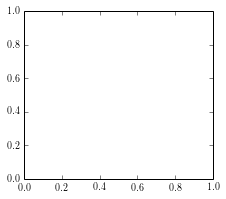

In [5]:
fig, ax = plt.subplots()
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))
out_mf = pickle.load(open('../predictions/mf-Austin-SanDiego.pkl','r'))

constant = 'True'
static = 'False'

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
axins = zoomed_inset_axes(plt.gca(), 1.3, loc=1)


for case in [2, 4]:
    
    for transfer in ['normal', 'transfer']:
        if case==2:
            algo = "{}, {}".format("TTF", transfer)
        else:
            algo = "{}, {}".format("STF", transfer)
        print algo
        error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o', ax=ax, linewidth=0.7)
        error.plot(label=algo, marker='.',ax=axins, legend=False, linewidth=0.6)
        
    

for transfer in ['normal', 'transfer']:
       
        algo = "{}, {}".format("MF", transfer)
        error = (pd.DataFrame(out_mf[transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
        error.plot(label=algo, marker='o', ax=ax, linewidth=0.7)

print "Here"
    
ax.legend(bbox_to_anchor=(1.05, 1), title='Algorithm, Setting')
ax.set_xlim((6, 110))
#plt.ylim((11, 18))
format_axes(plt.gca())
ax.set_xlabel(r"\% Adaptation homes")
ax.set_ylabel("Weighted PEC (Lower is better)")

print "hrer no"
x1, x2 = 6, 23
y1, y2= 10, 20
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
format_axes(ax)
# plt.savefig('../figures/main-sd.pdf', bbox_inches="tight")

In [16]:
error.head(6)

6.0     16.469755
7.0     16.469755
8.0     16.469755
9.0     16.830869
10.0    16.830869
20.0    16.692479
dtype: float64

In [10]:
pd.DataFrame(out[case][constant][static][transfer])

,0.0,6.0,7.0,8.0,9.0,10.0,15.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0
dw,1.825981,1.993909,1.993909,1.993909,1.937769,1.937769,1.905408,1.862263,1.889873,1.910070,1.861149,1.891008,1.906923,1.839479,1.858662,1.864538
fridge,7.983982,9.736004,9.736004,9.736004,10.120285,10.120285,8.944677,9.173578,9.017633,9.213749,9.415752,9.118611,8.647276,9.287585,8.984097,9.353207
hvac,28.294691,21.399345,21.399345,21.399345,20.812974,20.812974,17.882306,17.486216,17.240110,16.587617,16.254929,15.956766,15.587068,15.738815,15.960795,15.687429
mw,2.108620,2.018690,2.018690,2.018690,1.938011,1.938011,1.970185,1.985488,1.995488,1.982956,2.015906,1.983849,1.914318,1.951755,1.968057,1.977854
oven,2.442053,2.622134,2.622134,2.622134,2.680938,2.680938,2.620797,2.556656,2.569771,2.538570,2.521042,2.617621,2.543712,2.592791,2.477353,2.472795
wm,0.866586,0.776879,0.776879,0.776879,0.728500,0.728500,0.739869,0.760312,0.759170,0.758783,0.773893,0.753171,0.749318,0.758177,0.762215,0.760539


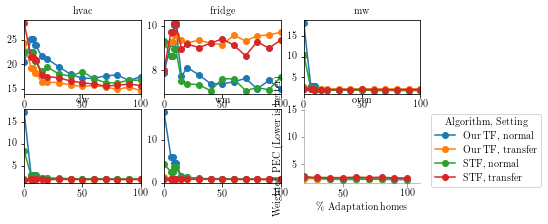

In [28]:
latexify(columns=2, fig_height=3)
fig, ax = plt.subplots(nrows=2, ncols=3)
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))
out_mf = pickle.load(open('../predictions/mf-Austin-SanDiego.pkl','r'))

constant = 'True'
static = 'False'
for case in [2, 4]:
    
    for transfer in ['normal', 'transfer']:
        if case==2:
            algo = "{}, {}".format("TTF", transfer)
        else:
            algo = "{}, {}".format("STF", transfer)
        error = pd.DataFrame(out[case][constant][static][transfer])
        for i, appliance in enumerate(APPLIANCES_ORDER[1:]):
            error.loc[appliance].plot(label=algo, marker='o', ax=ax[i/3, i%3], title=appliance)
    
"""
for transfer in ['normal', 'transfer']:
       
    algo = "{}, {}".format("MF", transfer)
    error = pd.DataFrame(out_mf[transfer]).T
    error.plot(label=algo, marker='o')
"""



    
plt.legend(bbox_to_anchor=(1.05, 1), title='Algorithm, Setting')
plt.xlim((20, 110))
#plt.ylim((11, 18))
format_axes(plt.gca())
plt.xlabel(r"\% Adaptation homes")
plt.ylabel("Weighted PEC (Lower is better)")
#plt.savefig('../figures/main-sd.pdf', bbox_inches="tight")

In [19]:
error.loc['dw']

0.0      1.825981
6.0      1.993909
7.0      1.993909
8.0      1.993909
9.0      1.937769
10.0     1.937769
15.0     1.905408
20.0     1.862263
30.0     1.889873
40.0     1.910070
50.0     1.861149
60.0     1.891008
70.0     1.906923
80.0     1.839479
90.0     1.858662
100.0    1.864538
Name: dw, dtype: float64

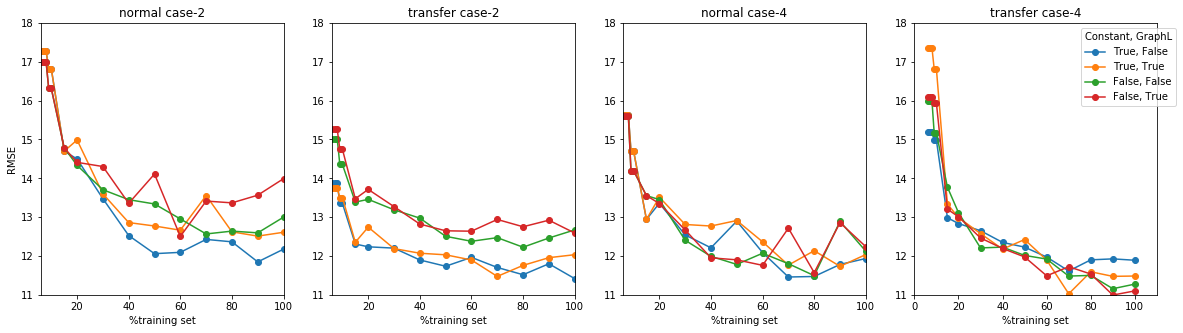

In [5]:
out

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax = axes.flatten()
count = 0


for case in [2]:
    for constant in ['True','False']:
        for static in ['False','True']:
            for transfer in ['normal']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
count += 1
for case in [2]:
    for constant in ['True','False']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_xlabel('%training set')


count += 1
for case in [4]:
    for constant in ['True','False']:
        for static in ['False','True']:
            for transfer in ['normal']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_xlabel('%training set')


count += 1
for case in [4]:
    for constant in ['True','False']:
        for static in ['False','True']:
            for transfer in ['transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("{} case-{}".format(transfer, case))
ax[count].set_xlabel('%training set')


plt.legend(['True, False', 'True, True', 'False, False', 'False, True'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
plt.xlim((0, 110))
plt.savefig("../results/constant-comparison.pdf", bbox_inches="tight", dpi=300, format='pdf')

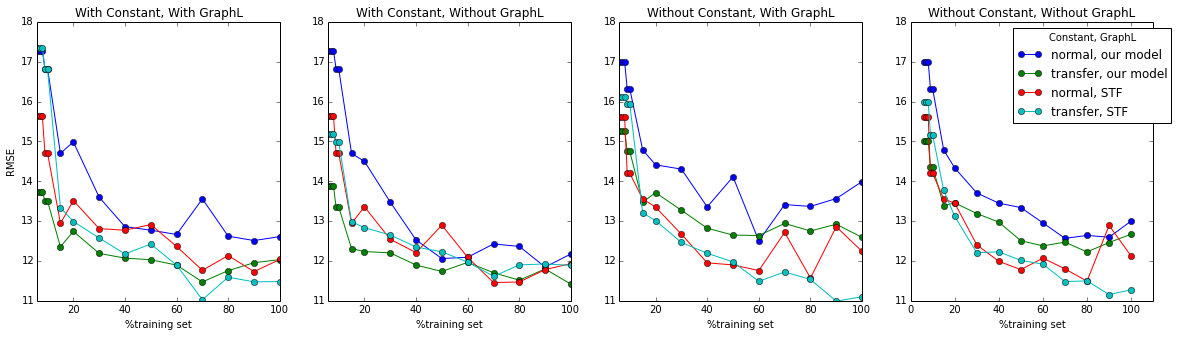

In [50]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))
out

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
ax = axes.flatten()
count = 0


for case in [2,4]:
    for constant in ['True']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("With Constant, With GraphL")
ax[count].set_ylabel('RMSE')
ax[count].set_xlabel('%training set')
count += 1
for case in [2,4]:
    for constant in ['True']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("With Constant, Without GraphL")
ax[count].set_xlabel('%training set')


count += 1
for case in [2,4]:
    for constant in ['False']:
        for static in ['True']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("Without Constant, With GraphL")
ax[count].set_xlabel('%training set')


count += 1
for case in [2,4]:
    for constant in ['False']:
        for static in ['False']:
            for transfer in ['normal', 'transfer']:
                algo = "{}_{}_{}_{}".format(transfer, constant, static, case)
                error = (pd.DataFrame(out[case][constant][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
#                 error = (pd.DataFrame(out[case][constant][static][transfer]).T).sum(axis=1)
                error.plot(ax = ax[count], label=algo, marker='o', ylim=(11,18))
ax[count].set_title("Without Constant, Without GraphL")
ax[count].set_xlabel('%training set')


plt.legend(['normal, our model', 'transfer, our model', 'normal, STF', 'transfer, STF'], loc='best', bbox_to_anchor=(1.1, 1), title='Constant, GraphL')
plt.xlim((0, 110))
plt.savefig("../results/comparison.pdf", bbox_inches="tight", dpi=300, format='pdf')

In [49]:
(pd.DataFrame(out[2]['True']['True']['transfer']).T*pd.Series(contri['SanDiego'])).sum(axis=1)


KeyError: 'True'

In [50]:
(pd.DataFrame(out[4]['False']['True']['transfer']).T*pd.Series(contri['SanDiego'])).sum(axis=1)

KeyError: 'True'

In [51]:
out_old = pickle.load(open('../predictions/tf-Austin-SanDiego.pkl','r'))
prev_best = (pd.DataFrame(out_old[4]['True']['normal']).T*pd.Series(contri['SanDiego'])).sum(axis=1)
prev_best_algo = prev_best.loc[[10., 30., 50., 70., 90.]]
prev_best_algo

10.0    15.116675
30.0    12.730277
50.0    12.757884
70.0    12.259274
90.0    12.052088
dtype: float64

In [9]:
error
algo

'transfer_False_True_STF'

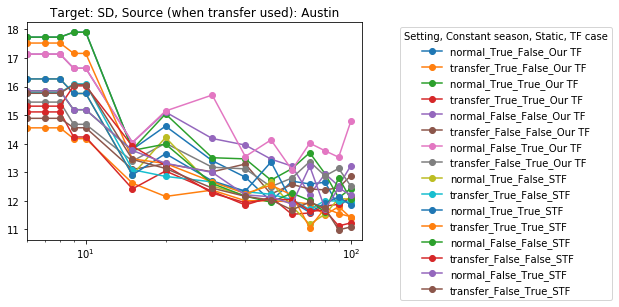

In [13]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))

mapping = {2:'TTF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', 'False']:
    
        for static in ['False','True']:
            for transfer in ['normal','transfer']:
                try:
                    algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                    error = (pd.DataFrame(out[case][constant_use][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
                    if error.mean()>11:
                        error.plot(label=algo, marker='o', logx=True)
                except Exception, e:
                    print e
                    print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((-1, 110))
plt.title("Target: SD, Source (when transfer used): Austin")

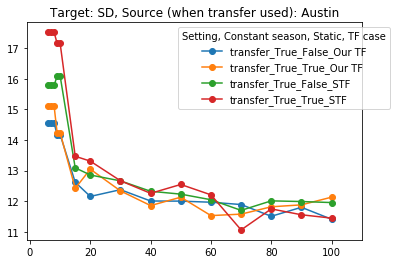

In [14]:
out = pickle.load(open('../predictions/lr-tf-Austin-SanDiego-all.pkl','r'))

mapping = {2:'TTF', 4:'STF'}
for case in [2, 4]:
    for constant_use in ['True', False]:
    
        for static in ['False','True']:
            for transfer in ['transfer']:
                try:
                    algo = "{}_{}_{}_{}".format(transfer, constant_use, static, mapping[case])
                    error = (pd.DataFrame(out[case][constant_use][static][transfer]).T*pd.Series(contri['SanDiego'])).sum(axis=1)
                    if error.mean()>11:
                        error.plot(label=algo, marker='o', logx=False)
                except Exception, e:
                    print e
                    print case, static, transfer, "------"
#prev_best_algo.plot(label='prev', marker='*')
plt.legend(bbox_to_anchor=(1.1, 1), title='Setting, Constant season, Static, TF case')
plt.xlim((-1, 110))
plt.title("Target: SD, Source (when transfer used): Austin")


In [54]:
params = pickle.load(open('../predictions/params-lr-tf-Austin-SanDiego.pkl','r'))


In [115]:
case =2
constant_use = 'True'
static = 'True'
setting = 'transfer'
lrs = {}
n_iter = {}
for train in [10, 30, 50, 70, 90]:
    lrs[train] = []
    n_iter[train] = []
    for random_seed in range(4):
        for fold in range(10):
            lrs[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Learning Rate'])
            n_iter[train].append(params[case][constant_use][static][setting][train][random_seed][fold]['Iterations'])
    lrs[train] = pd.value_counts(pd.Series(lrs)[train])
    n_iter[train] = pd.value_counts(pd.Series(n_iter)[train])
lrs = pd.DataFrame(lrs)
n_iter = pd.DataFrame(n_iter)

In [117]:
pd.DataFrame(n_iter)

,10,30,50,70,90
100,4,10,11,8,13
700,10,12,12,15,5
1300,26,18,17,17,22


In [100]:
lr_optimal = {}
for train in [10, 30, 50, 70, 90]:
    lr_optimal[train] = pd.value_counts(pd.DataFrame(a)[train])
    

In [ ]:
pd.DataFrame(lrs).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal Learning Rate for \n Our TF Transfer from Austin ->SD")
plt.legend(title="Learning rate")

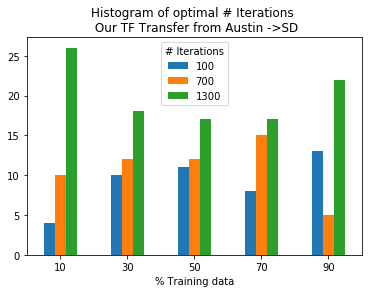

In [126]:
pd.DataFrame(n_iter).T.plot(kind='bar', rot=0)
plt.xlabel("% Training data")
plt.title("Histogram of optimal # Iterations \n Our TF Transfer from Austin ->SD")
plt.legend(title="# Iterations")